# NLP using Word Vectors

In [1]:
import numpy as np
import pandas as pd

### Regular word encoding (one-hot-encodding & word-count-vectorisation)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer 

In [54]:
text_data = ['the cat sat on the car',
       'the data is on the boat',
       'why is my cat on the boat']

In [45]:
encoder = CountVectorizer()
encoder.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [46]:
word_count_data = encoder.transform(text_data).todense()
word_count_data

matrix([[0, 1, 1, 0, 0, 0, 1, 1, 2, 0],
        [1, 0, 0, 1, 1, 0, 1, 0, 2, 0],
        [1, 0, 1, 0, 1, 1, 1, 0, 1, 1]])

In [47]:
word_labels = encoder.get_feature_names()
word_labels

['boat', 'car', 'cat', 'data', 'is', 'my', 'on', 'sat', 'the', 'why']

In [48]:
word_count_df = pd.DataFrame(word_count_data, columns = word_labels)
word_count_df

,boat,car,cat,data,is,my,on,sat,the,why
0,0,1,1,0,0,0,1,1,2,0
1,1,0,0,1,1,0,1,0,2,0
2,1,0,1,0,1,1,1,0,1,1


### What are word vectors

In [127]:
import spacy

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [50]:
nlp = spacy.load('en_core_web_md')

### How to use word vectors for comparing word similarity

In [80]:
def get_text_vectors(texts):
    vectors = []
    for text in texts:
        vector = nlp(text).vector
        vectors.append(vector)
    vectors = np.array(vectors)
    return vectors

In [81]:
word_vectors = get_text_vectors(word_labels)

In [82]:
pca = PCA(n_components=2)
pca.fit(word_vectors)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
word_vectors_2 = pca.transform(word_vectors)

In [123]:
def plot_text_vectors(text, vectors):
    plt.scatter(x=vectors[:,0], 
                y=vectors[:,1], 
                alpha=0.4)

    for word, x_y in zip(text, vectors):
        x, y = x_y
        plt.text(x, y, word)

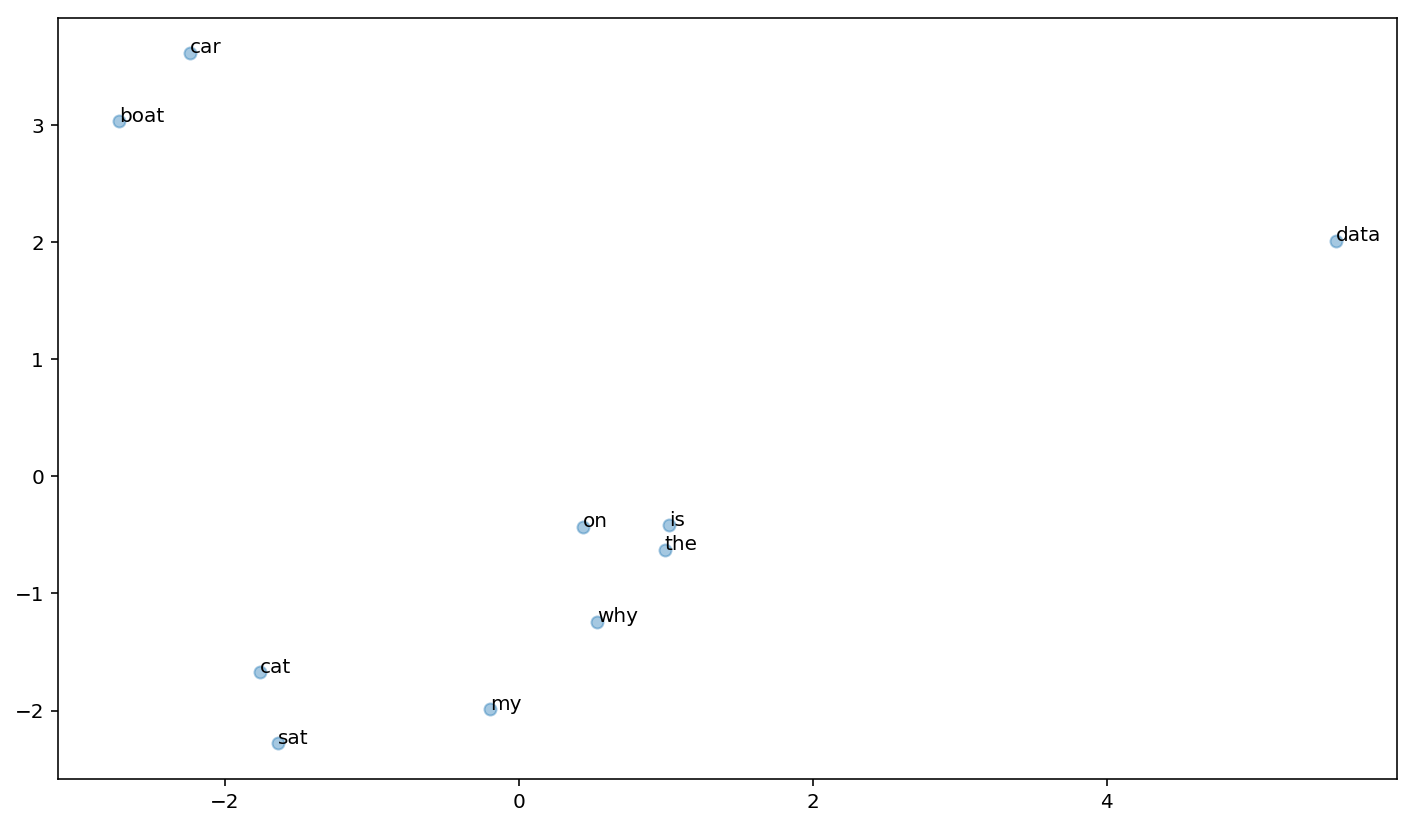

In [128]:
plt.figure(figsize=(12,7))

plot_text_vectors(word_labels, word_vectors_2)

plt.show()

### How to get a simple document vector

Just by averaging the word vectors in a document.

In [86]:
doc_vectors = get_text_vectors(text_data)

In [87]:
doc_vectors.shape

(3, 300)

In [88]:
doc_vectors_2 = pca.transform(doc_vectors)

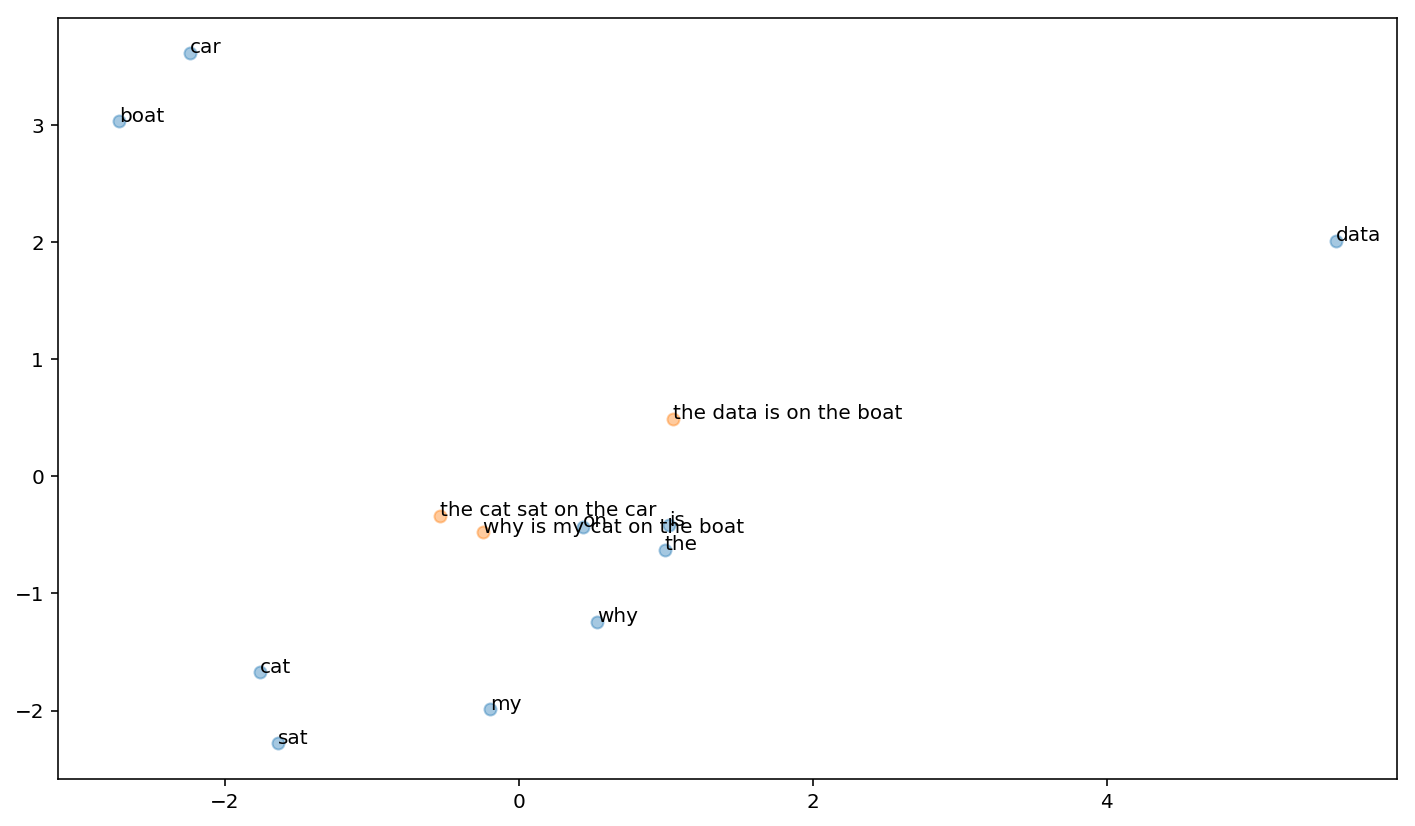

In [129]:
plt.figure(figsize=(12,7))

plot_text_vectors(word_labels, word_vectors_2)

plot_text_vectors(text_data, doc_vectors_2)    
    
plt.show()

### Improve document vector through stop word removal

In [69]:
from spacy.lang.en.stop_words import STOP_WORDS

In [113]:
def remove_stop_words(text):
    return ' '.join([word for word in text.split(' ') if word not in STOP_WORDS])

In [116]:
text_wo_stop_words = [remove_stop_words(doc) for doc in text_data]
text_wo_stop_words

['cat sat car', 'data boat', 'cat boat']

In [117]:
text_wo_stop_words_vectors = get_text_vectors(text_wo_stop_words)
text_wo_stop_words_vectors.shape

(3, 300)

In [118]:
text_wo_stop_words_vectors_2 = pca.transform(text_wo_stop_words_vectors)
text_wo_stop_words_vectors_2

array([[-1.87877553, -0.11184559],
       [ 1.42031536,  2.52090286],
       [-2.23974034,  0.67976002]])

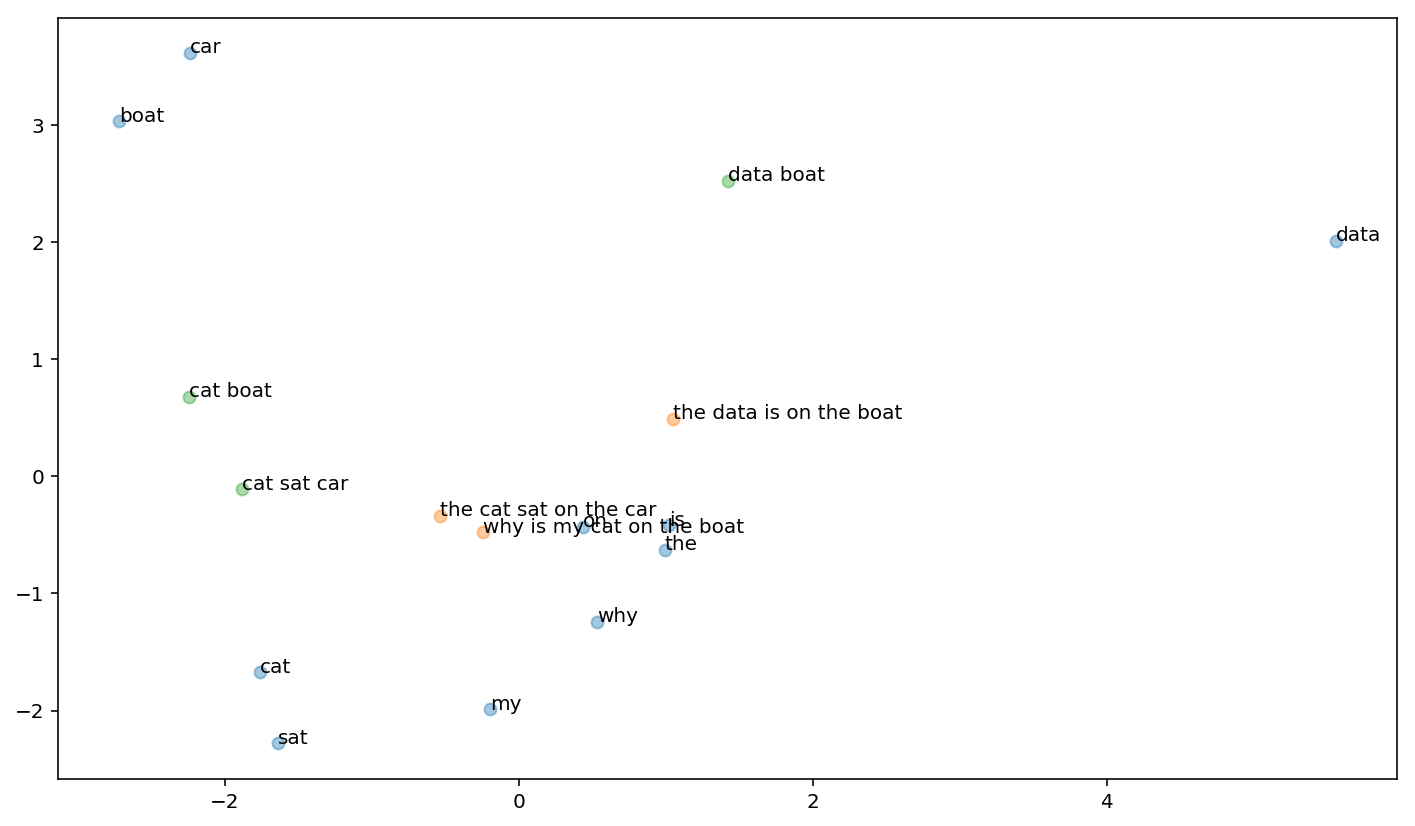

In [130]:
plt.figure(figsize=(12,7))

plot_text_vectors(word_labels, word_vectors_2)

plot_text_vectors(text_data, doc_vectors_2)    

plot_text_vectors(text_wo_stop_words, text_wo_stop_words_vectors_2)    
    
plt.show()

### Word vectors in getting similar articles

In [108]:
text_wo_stop_words

['cat boat', 'cat boat', 'cat boat']